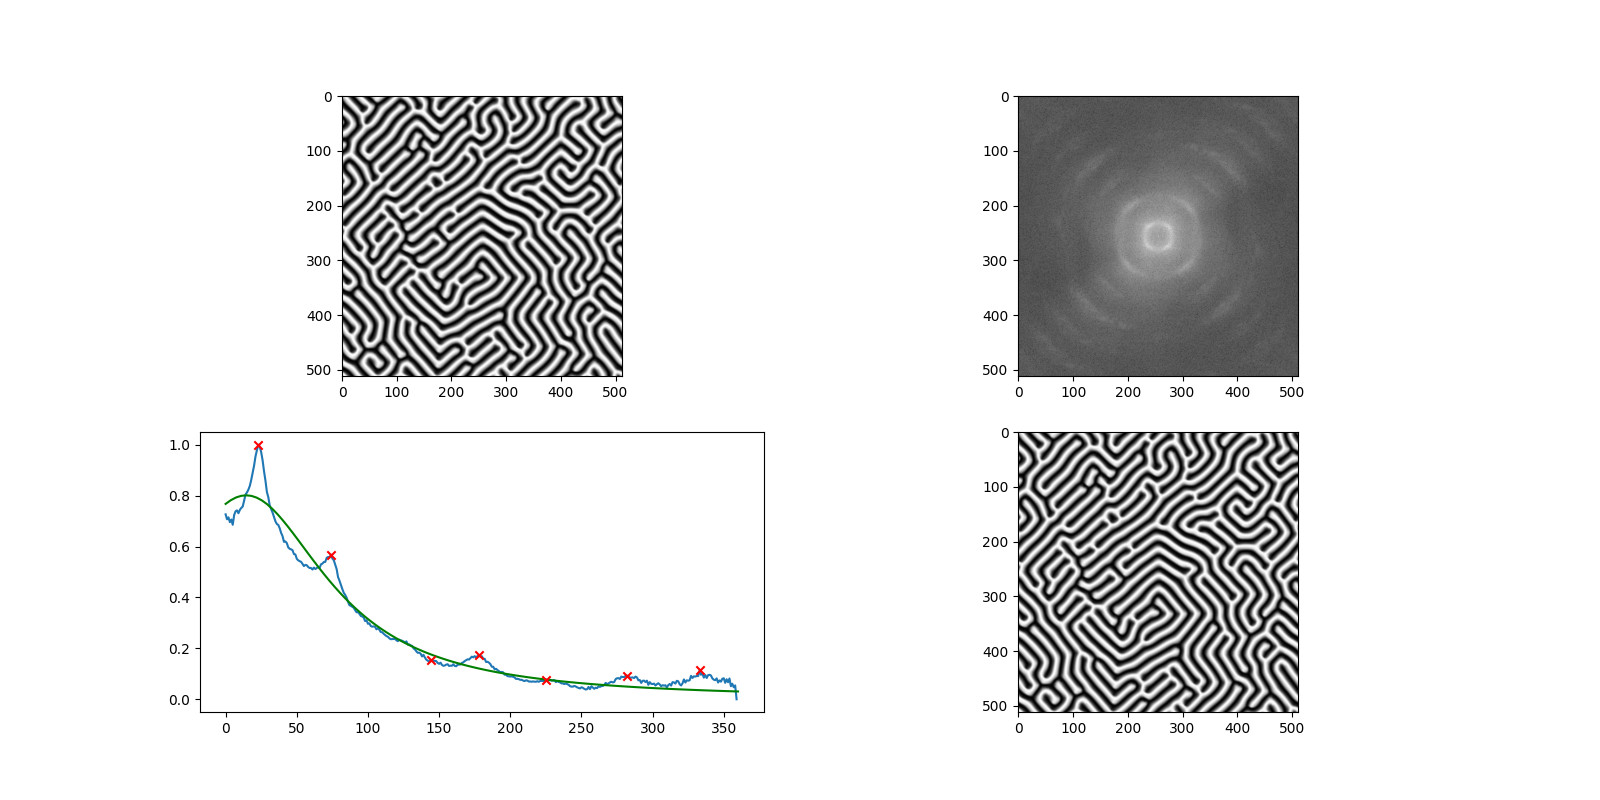

In [162]:
%matplotlib widget

import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.optimize as opt
import radialProfile

def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

def radial_profile(data):
    center = (np.round(data.shape[0]), np.round(data.shape[1]))
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile

if __name__ == "__main__":
    img = cv2.imread('test4.png',cv2.IMREAD_GRAYSCALE)


    # Create the FFT of img
    freq_space = np.fft.fft2(img)
    # Shift the Fourier transform to the center
    fshift = np.fft.fftshift(freq_space)
    # Calculate the magnitude spectrum
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    
    # Calculate the radial profile
    rad_prof = radialProfile.azimuthalAverage(magnitude_spectrum)
    rad_prof = rad_prof[~np.isnan(rad_prof)]
    rad_prof = (rad_prof-np.min(rad_prof))/(np.max(rad_prof)-np.min(rad_prof))
    
    fig, ax = plt.subplots(2,2, figsize=(16,8))

    peaks, props = scipy.signal.find_peaks(rad_prof, width=4)
    #print(peaks)
    
    X = range(rad_prof.shape[0])
    popt, pcov = opt.curve_fit(lorentzian, X, rad_prof, [peaks[0], 1, 1])

    ax[0,0].imshow(img, cmap='gray')
    ax[0,1].imshow(magnitude_spectrum, cmap='gray')
    
    ax[1,0].plot(X, rad_prof)
    ax[1,0].scatter(peaks, rad_prof[peaks], c='r', marker='x', zorder=3)
    x_param = np.linspace(0,len(X), 100)
    ax[1,0].plot(x_param, lorentzian(x_param, popt[0], popt[1], popt[2]), c='g')

    rev_im = np.fft.ifft2(freq_space)
    ax[1,1].imshow(np.abs(rev_im), cmap='gray')

    plt.show()

In [163]:
x = np.linspace(-5, 5, 101)
y = np.linspace(-5, 5, 101)
# full coordinate arrays
xx, yy = np.meshgrid(x, y)
zz = np.sqrt(xx**2 + yy**2)
xx.shape, yy.shape, zz.shape

((101, 101), (101, 101), (101, 101))

In [164]:
# sparse coordinate arrays
xs, ys = np.meshgrid(x, y, sparse=True)
zs = np.sqrt(xs**2 + ys**2)
xs.shape, ys.shape, zs.shape

((1, 101), (101, 1), (101, 101))

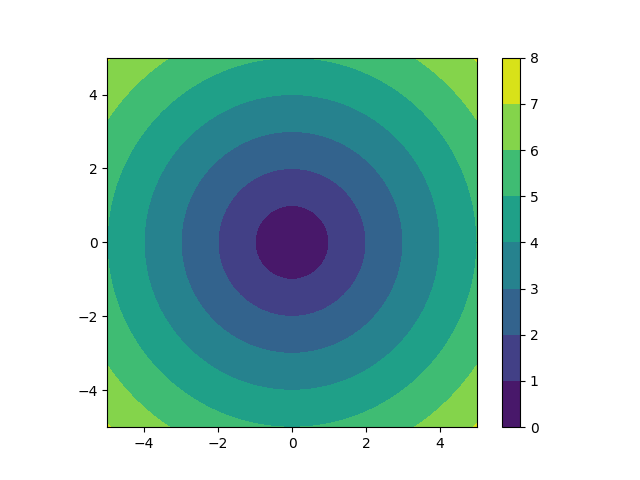

In [165]:
ax1 = plt.figure().add_subplot()
h = plt.contourf(x, y, zs)
plt.axis('scaled')
plt.colorbar()
plt.show()

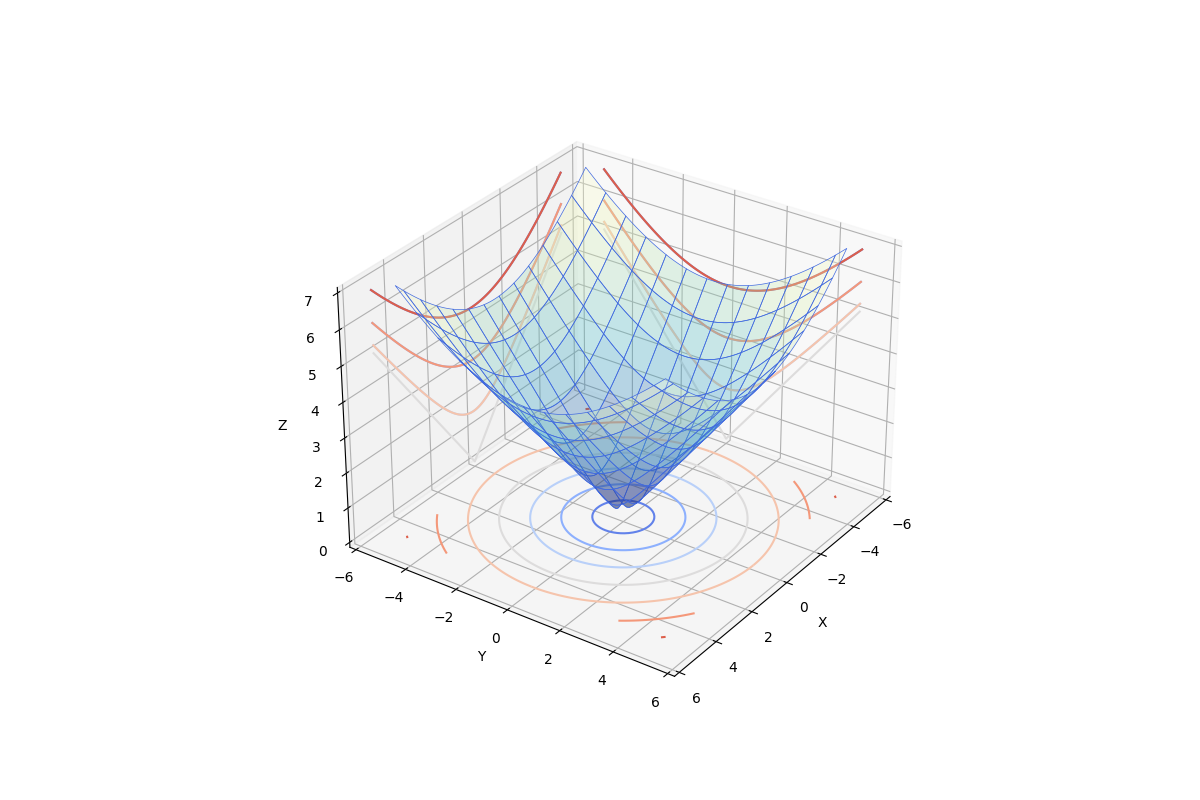

In [166]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')


ax.plot_surface(xs, ys, zs, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3, cmap=plt.cm.YlGnBu_r)

#for angle in range(0, 360):
ax.view_init(30, 35)

ax.contour(xx, yy, zs, zdir='z', offset=0, cmap='coolwarm')
ax.contour(xx, yy, zs, zdir='x', offset=-6, cmap='coolwarm')
ax.contour(xx, yy, zs, zdir='y', offset=-6, cmap='coolwarm')

ax.set(xlim=(-6, 6), ylim=(-6, 6), zlim=(0, 7),
       xlabel='X', ylabel='Y', zlabel='Z')


plt.show()


## 3D plotting and 3-dimensional data

- Many systems and their behaviour can be studied using multi-dimensional data
    - From simple systems such as an electric potential over a conducting surface to abstractions of physical systems, such as micromagnetic structure energies w.r.t. 2 parameters
- If possible, problems should always be reduced such that the analysis is easier to understand visually
    - In scientific publishing clear visualization is key: it is much easier to explain system behaviour using simple to understand visualization of data instead of throwing complicated and cumbersome graphs at people
- Sometimes reducing the problem to a simpler one isn't possible or reasonable.
    - Sometimes more complex visualization techniques give a much fuller picture of the system behaviour we are studying


### Multi-dimensional data and handling it

<i>One of the best ways to handle data in Python is with Pandas library</i>.<br>
Pandas is specifically developed for data analysis and handling and presents a <b>lot</b> of pre-built tools for manipulating complex dataframes.

In addition <i>numerical python</i>, or Numpy as its called among friends, is also a great tool and we'll be employing that very soon.

Let's take a look at a couple examples.


#### You can mostly skip this first code block for now, since Pandas will be the topic of Nico and Teemu in the coming workshops.

In [167]:
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate a Lorentzian value
def Lorentzian(x, x0, a, gam):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

np.random.seed(42)

X = np.linspace(-5,5,100)
Y = Lorentzian(X, 0, 1, 1) + np.random.normal(0, 0.1, 100)
# Create a Pandas dataframe filled with random numbers in a Lorentzian distribution
df = pd.DataFrame({'X': X,'Y': Y})

# Show the dataframe transposed (for better visualization)
df.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
X,-5.000000,-4.898990,-4.79798,-4.696970,-4.595960,-4.494949,-4.393939,-4.292929,-4.191919,-4.090909,...,4.090909,4.191919,4.292929,4.393939,4.494949,4.595960,4.696970,4.797980,4.898990,5.000000
Y,0.088133,0.026173,0.10640,0.195665,0.021787,0.023746,0.207166,0.128212,0.006897,0.110640,...,0.066092,0.150708,-0.018736,0.016479,0.007949,-0.101149,0.072974,0.067736,0.040511,0.015003


So now we have a 2-dimensional <b>dataframe</b>, a Pandas data structure, to store some created data. In actual application this could be simulated, calculated or experimentally measured data.

Let us see how did with the creation of the data. Let's plot it!

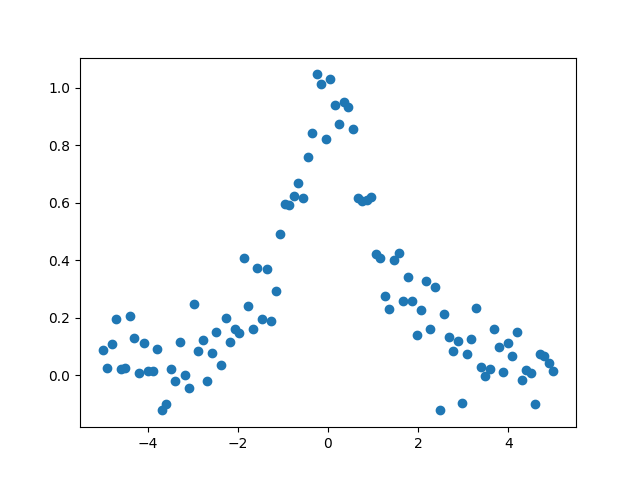

In [168]:
# Create a figure and plot the data
ax = plt.figure().add_subplot()
ax.plot(df['X'], df['Y'], 'o')
plt.show()

So now we see very clearly the data we created is a Lorentzian distribution with some error added in for good measure. Now then, how should we proceed if instead wanted to create a 3-dimensional image?

So what we want to do is plot a 3rd variable as a function of other 2, say if we wanted to visualize a similar Lorentzian peak in 3D space. Then the 2 known variables would be our $x$ and $y$ spatial directions and the 3rd would be the height $z$ of the distribution at a given point $(x,y)$.

In this problem we can employ Numpy and one of its incredibly useful functions: a <b>meshgrid</b>.

Meshgrid takes in as arguments $n$ arrays (or what are known as list-like objects). It then determines these as the "axes" of an $n$-dimensional array. 

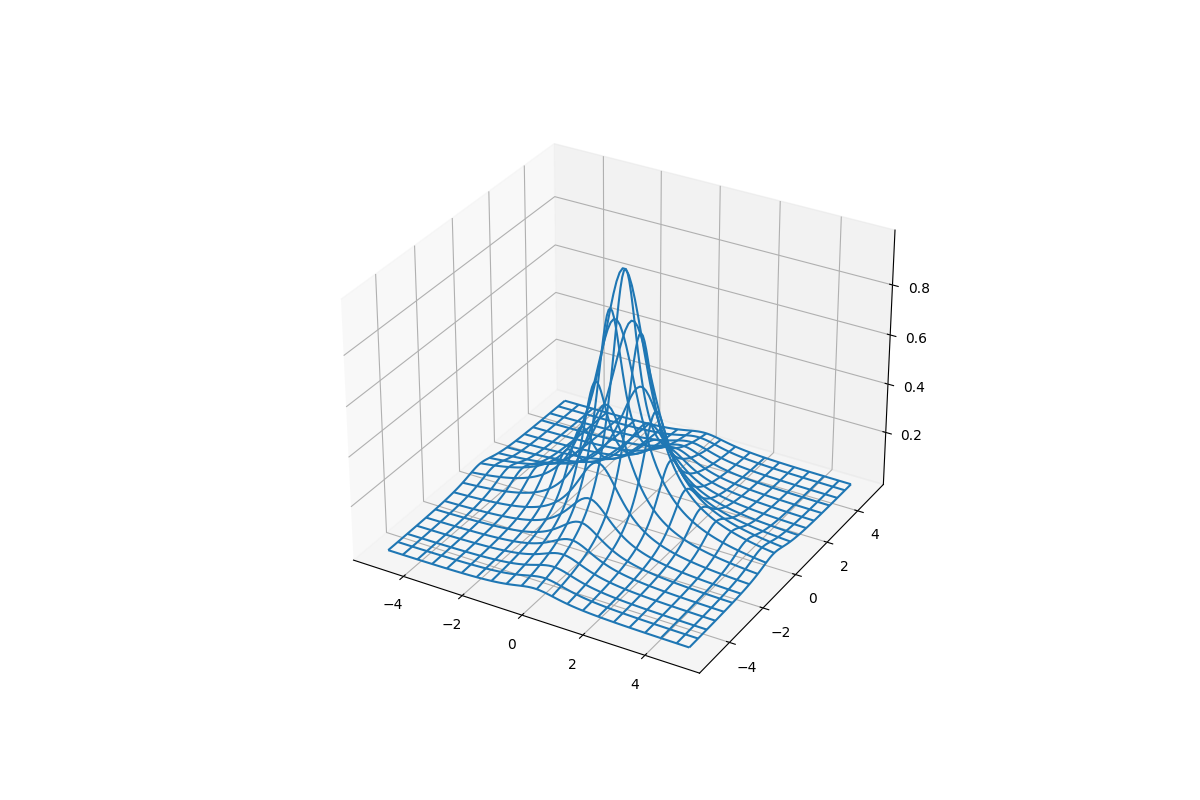

In [178]:

# Create meshgrids for x and y
gridx, gridy = np.meshgrid(X, X, indexing='xy')

# Calculate z values
zvals = Lorentzian(gridx, 0, 1, 1) * Lorentzian(gridy, 0, 1, 1)

#zvals = (Lorentzian(gridx, 0, 1, 1) + np.random.normal(0, 0.1, 100)) * (Lorentzian(gridy, 0, 1, 1) + np.random.normal(0, 0.1, 100))

ax = plt.figure(figsize=(12,8)).add_subplot(projection='3d')
ax.plot_wireframe(gridx, gridy, zvals, cmap='viridis', rstride=5, cstride=5)

plt.show()